This notebook creates figusare of distributions of top ROIs in the decoding-based BH score (Figure S1).

In [1]:
from glob import glob
import json
import os

import matplotlib.pyplot as plt
import hdf5storage
import numpy as np

from bhscore import compute_bhscore

In [2]:
# Settings
with open('settings.json', 'r') as f:
    settings = json.load(f)

networks = settings['dnns']

subjects = settings['subjects']
rois = settings['rois']

decoding_accuracy_dir = './data/decoding_accuracy/ImageNetTest'

In [3]:
# Load decoding accuracy
decoding_accuracy = {}

for net_name, net in networks.items():
    layers = net['layers']
    acc_net = []

    for lay in layers:
        acc_layer = []  # This should be a 2-d array of ROIs x units.

        for roi in rois:
            acc_roi = []

            # Pool decoding accuracies across subjects
            for sub in subjects:
                acc_file = os.path.join(decoding_accuracy_dir, net['dir'], lay, sub, roi, 'accuracy.mat')
                acc = hdf5storage.loadmat(acc_file)['accuracy'].flatten()
                acc_roi.append(acc)
            acc_roi = np.hstack(acc_roi)
            acc_layer.append(acc_roi)

        acc_layer = np.vstack(acc_layer)
        acc_net.append(acc_layer)

    decoding_accuracy.update({net_name: acc_net})

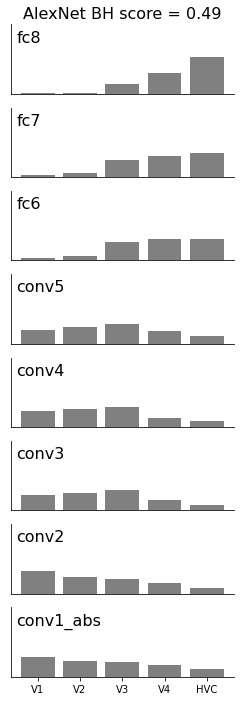

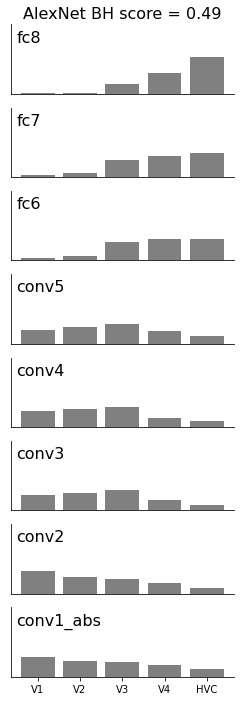

In [4]:
# Figure production function

def makefig_top_roi_distribution(decoding_accuracy, layers, dnn_name):
    dnn = 'AlexNet'

    bh_score, top_rois = compute_bhscore(decoding_accuracy, pval=0.05, return_top_rois=True)
    n_layers = len(layers)

    fig = plt.figure(figsize=(4, 1.5 * n_layers))

    for i, (layer, top_roi) in enumerate(zip(layers, top_rois)):

        y = np.array([
            np.sum(top_roi == 0),
            np.sum(top_roi == 1),
            np.sum(top_roi == 2),
            np.sum(top_roi == 3),
            np.sum(top_roi == 4),
        ])
        y = y / np.size(top_roi)

        plt.subplot(n_layers, 1, n_layers - i)

        plt.bar([0, 1, 2, 3, 4], y, width=0.8, color='gray')
        plt.xticks([])
        if i == 0:
            plt.xticks([0, 1, 2, 3, 4], labels=['V1', 'V2', 'V3', 'V4', 'HVC'])
        plt.ylim([0, 1])
        plt.yticks([])
        plt.text(-0.5, 0.75, layer, fontsize=16)

        if i == len(layers) - 1:
            plt.title('{} BH score = {:.2f}'.format(dnn_name, bh_score), fontsize=16)

        # Box off
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

    return fig


dnn = 'AlexNet'
makefig_top_roi_distribution(
    decoding_accuracy[dnn], settings['dnns'][dnn]['layers'], dnn
)

AlexNet
VGG-F
VGG-M
VGG-S
VGG-16
VGG-19
DenseNet-121
DenseNet-161
DenseNet-169
DenseNet-201
ResNet-50-v2
ResNet-101-v2
ResNet-152-v2
ResNet-18
ResNet-34
Inception-v1
Inception-v2
Inception-v3
Inception-v4
Inception-ResNet-v2
SqueezeNet-1.0
SqueezeNet-1.1


<ipython-input-4-99a3d4f64e2d>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4, 1.5 * n_layers))


NASNet-Mobile
NASNet-Large
PNASNet-Large
CORnet-Z
CORnet-R
CORnet-S
MobileNet-v2-1.4-224


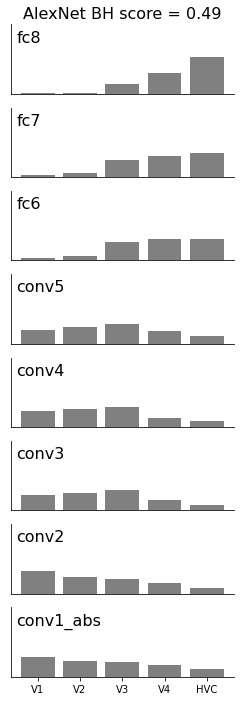

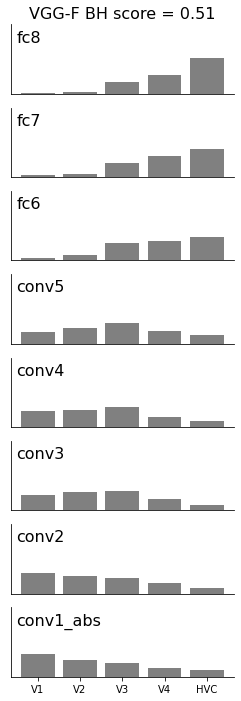

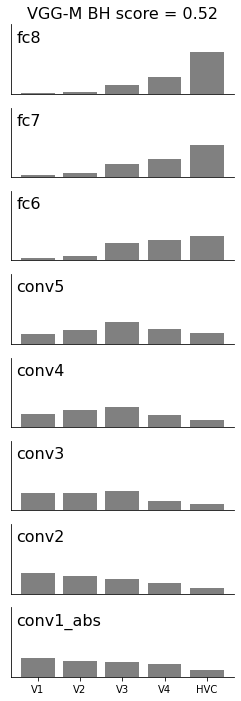

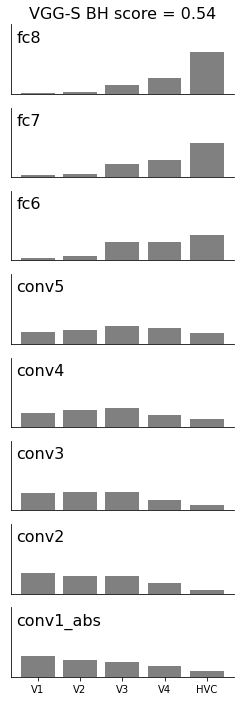

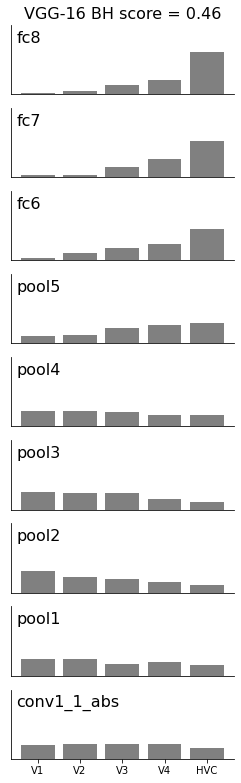

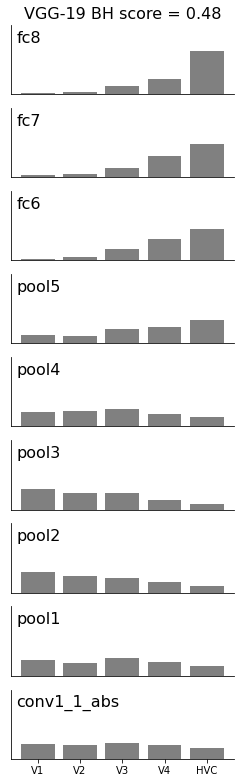

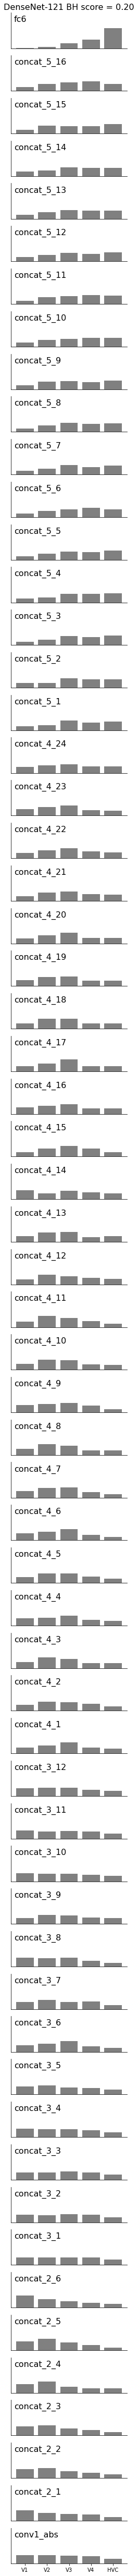

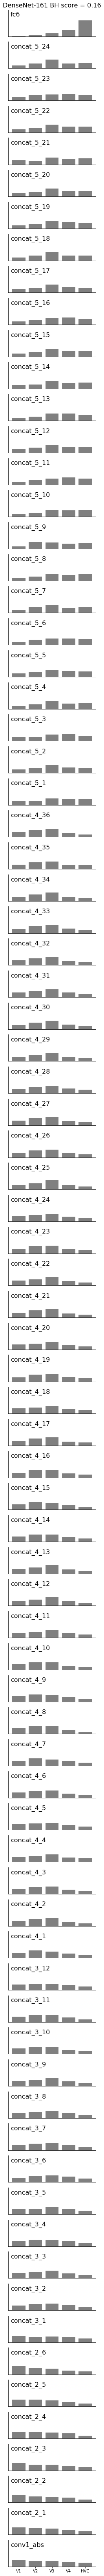

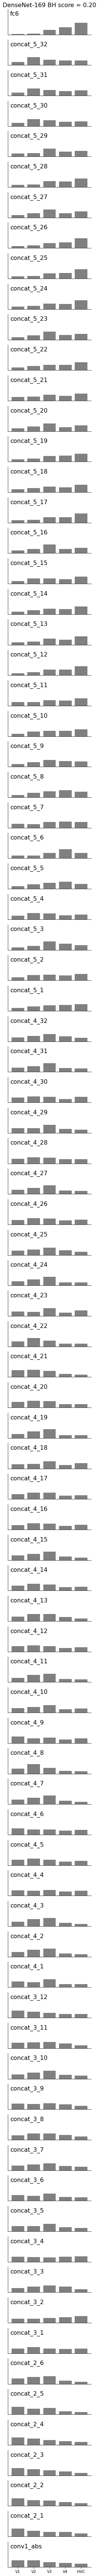

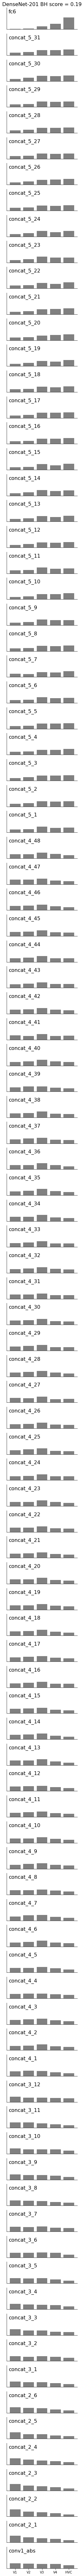

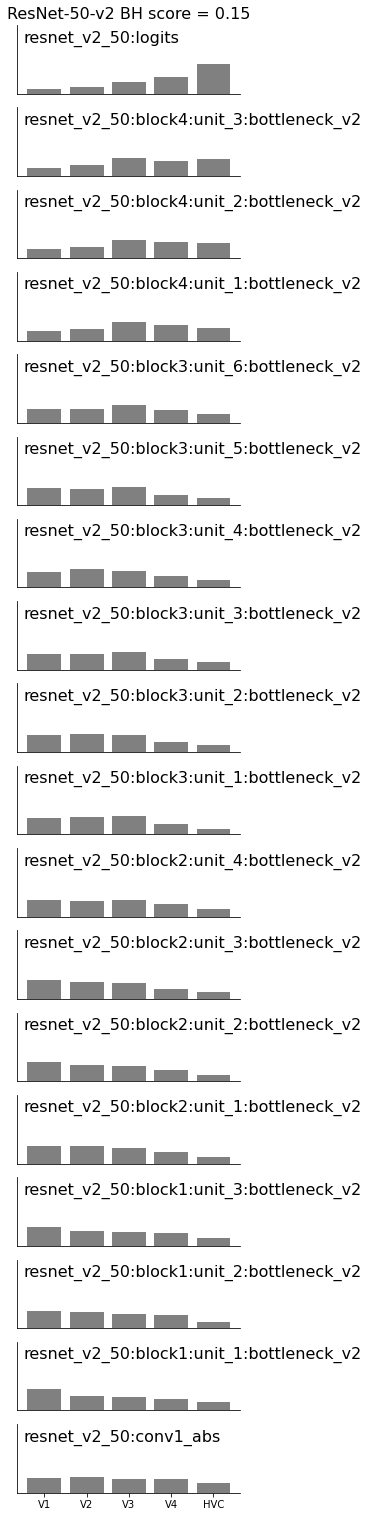

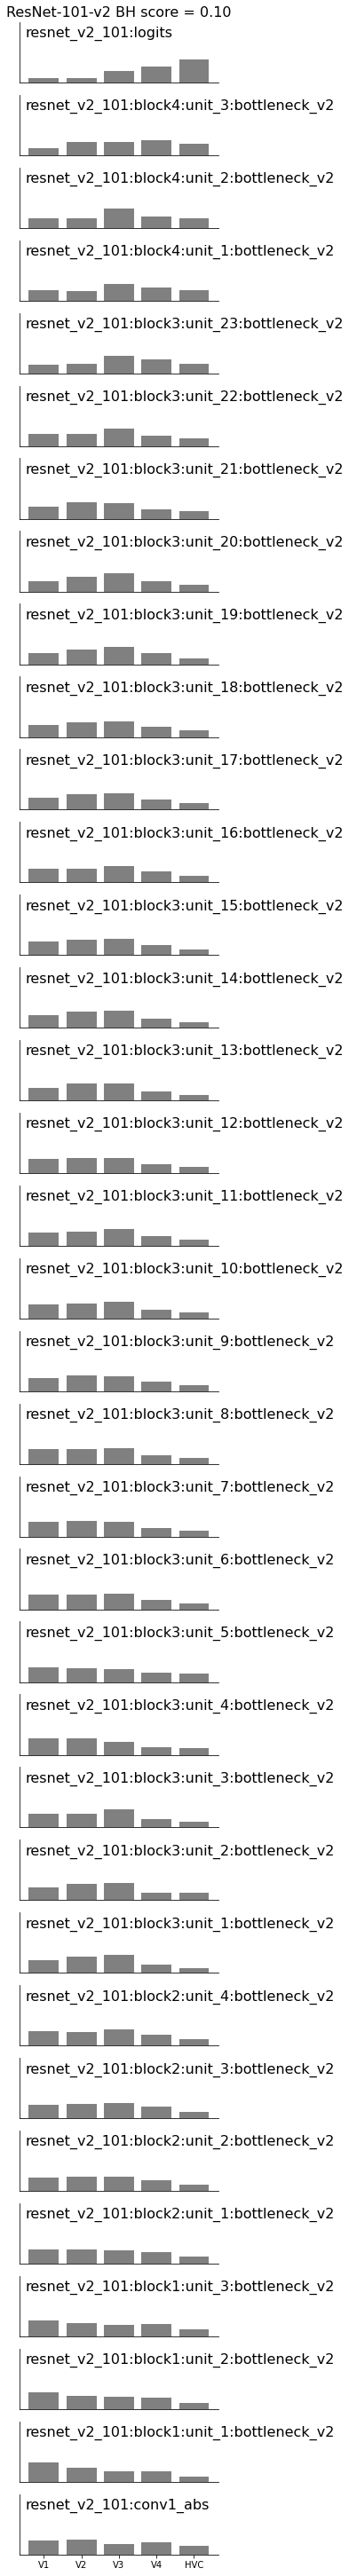

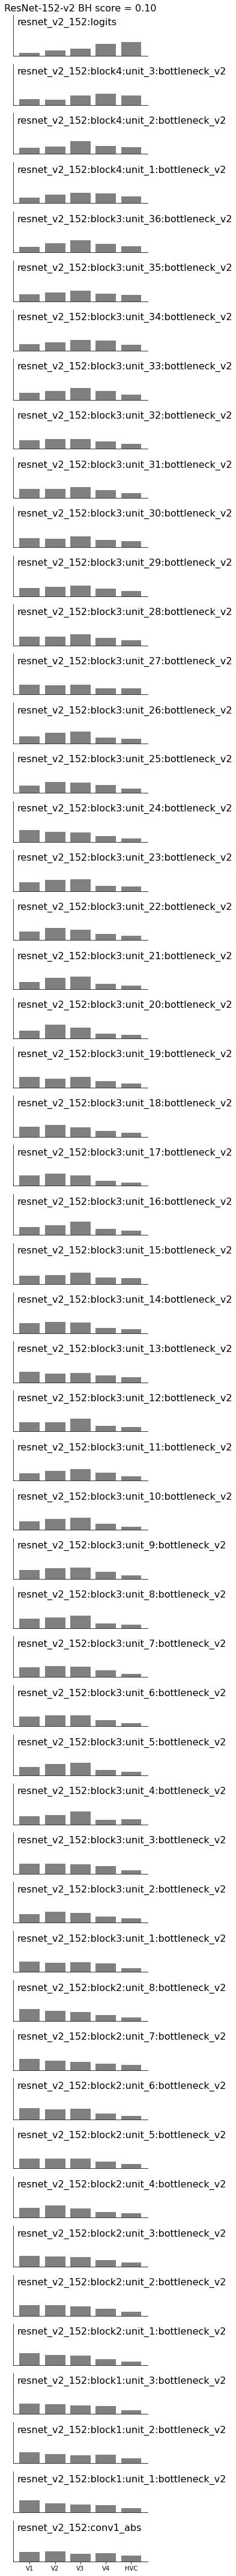

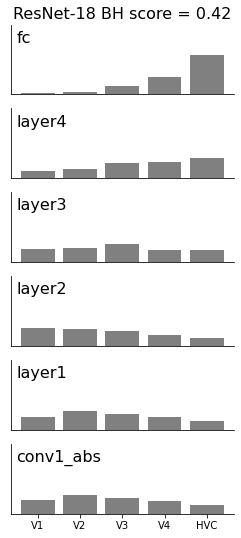

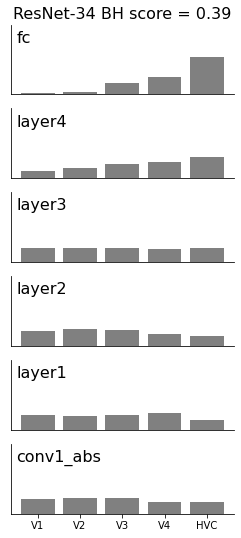

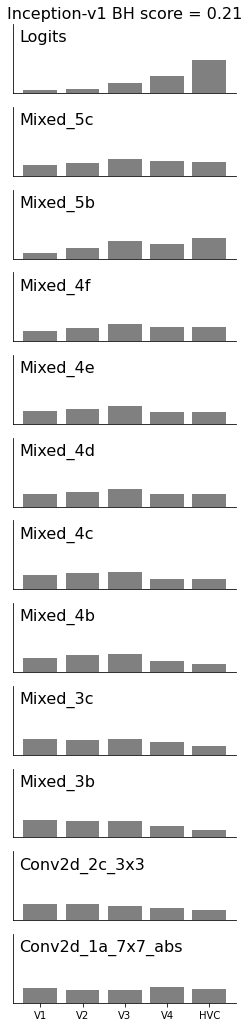

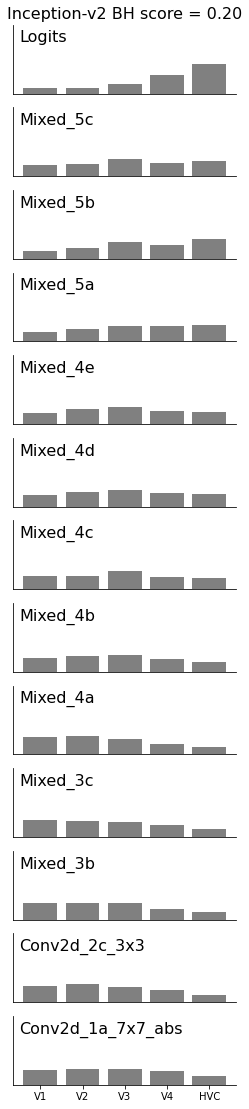

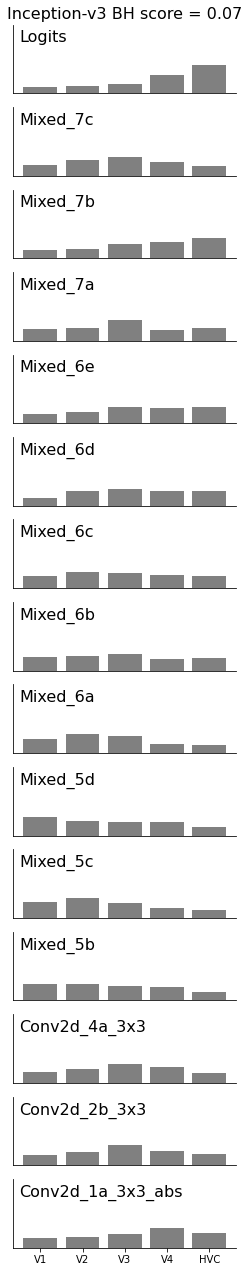

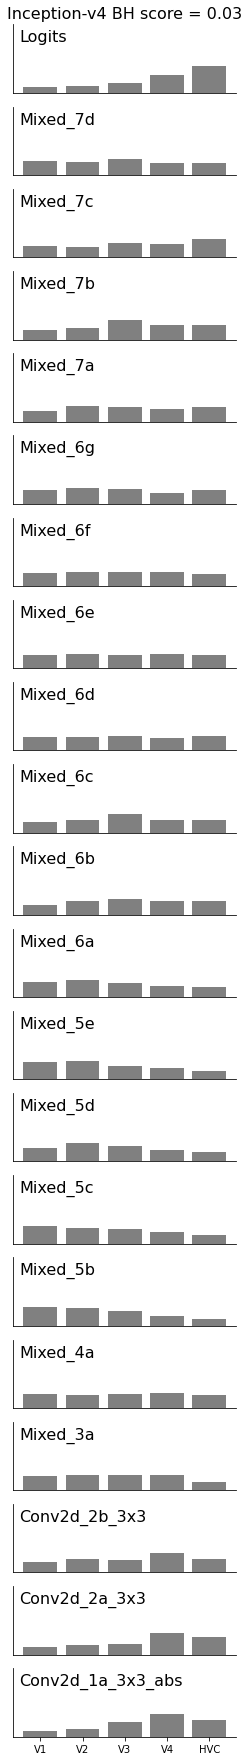

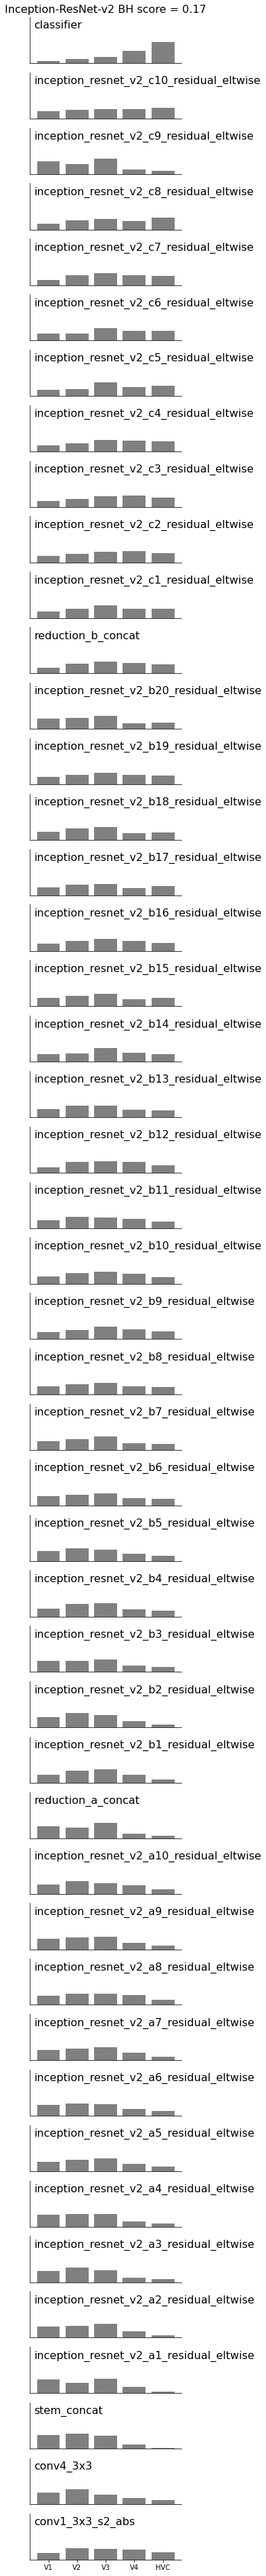

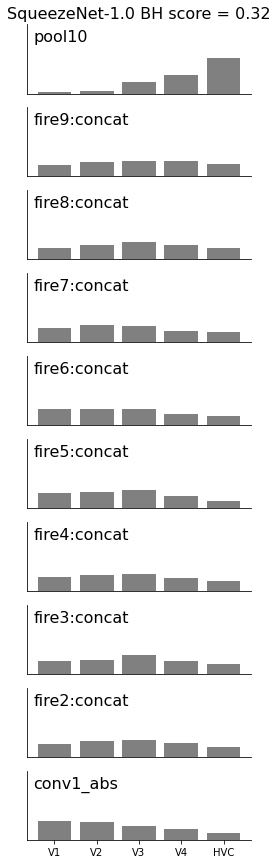

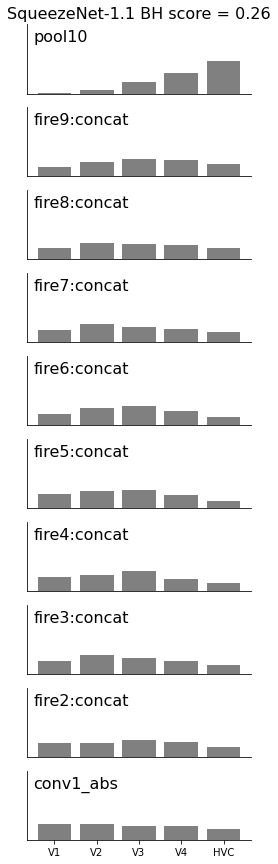

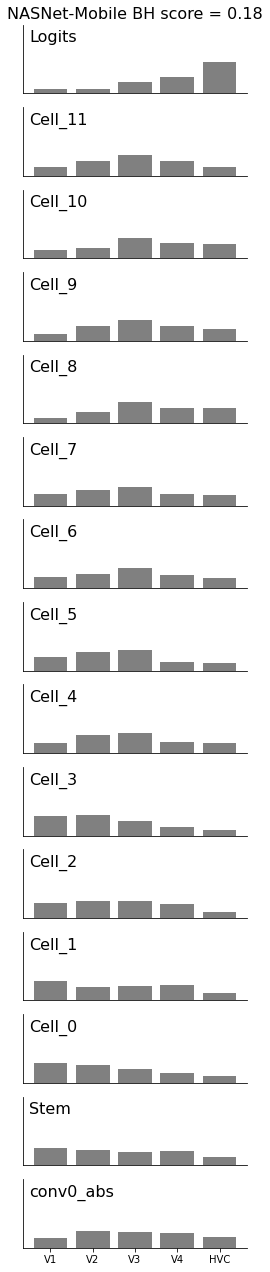

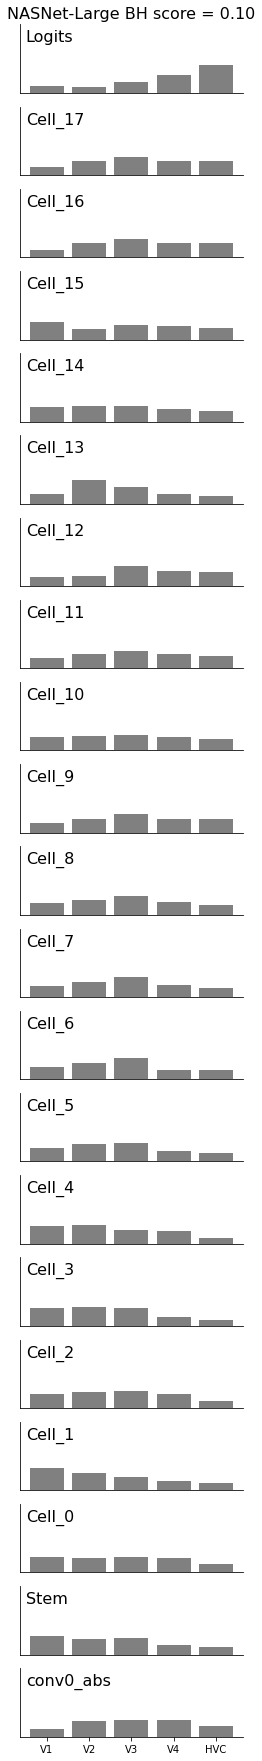

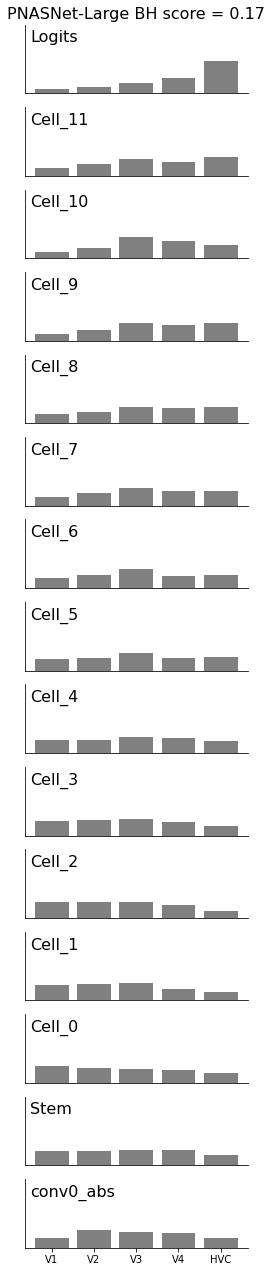

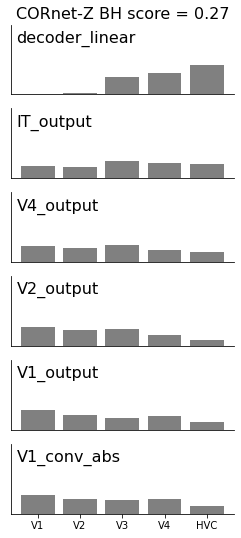

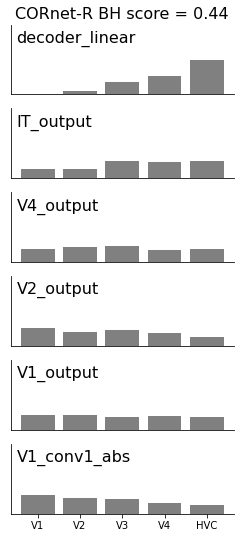

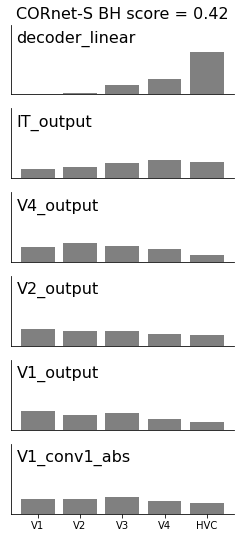

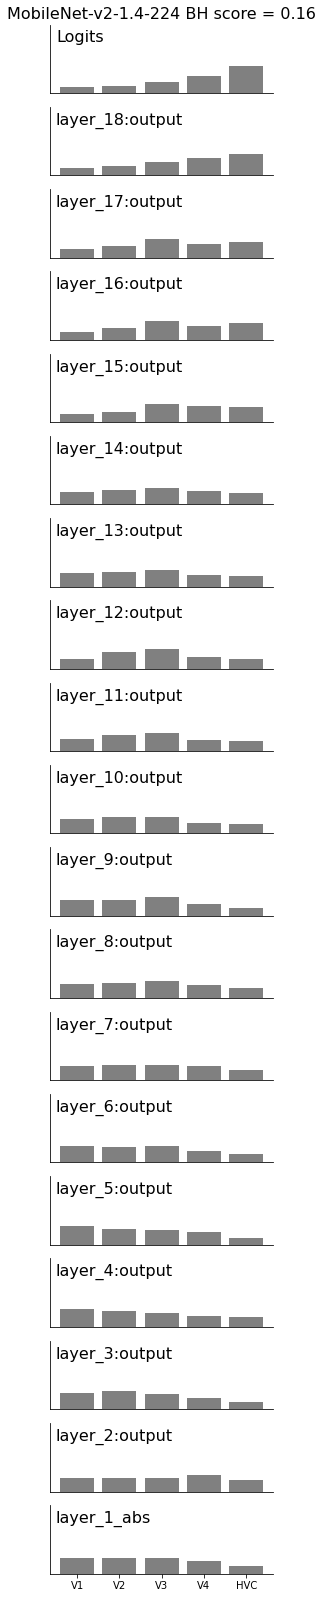

In [5]:
for dnn in settings['dnns'].keys():
    print(dnn)
    makefig_top_roi_distribution(
        decoding_accuracy[dnn], settings['dnns'][dnn]['layers'], dnn
    )